# Read in Hourly Air Data
Yo Kimura generated files that have hourly air measures. Files are very large. Need to see if it is possible to read them in and clean them.

## Description of Program
- program:    ip1_2cv1_HourlyAir
- task:       Read Air files with hourly data
- Version:    2026-01-09
- project:    Southeast Texas Urban Integrated Field Lab
- funding:	  DOE
- author:     Nathanael Rosenheim

## Step 0: Good Housekeeping

In [1]:
# 1. Import all packages
import pandas as pd     # For obtaining and cleaning tabular data
import os # For saving output to path
import zipfile # For handling zip files

In [3]:
# 2. Check versions
import sys
print("Python Version     ", sys.version)
print("geopandas version: ", pd.__version__)

Python Version      3.13.9 | packaged by conda-forge | (main, Oct 22 2025, 23:12:41) [MSC v.1944 64 bit (AMD64)]
geopandas version:  2.3.3


In [4]:
# 3. Check working directory
# Get information on current working directory (getcwd)
os.getcwd()

'c:\\Users\\nathanael99\\MyProjects\\GitHub\\integrate_people_theme1_cookbook'

In [5]:
#4. Store Program Name for output files to have the same name
programname = "ip1_2cv1_hourlyair"
# Make directory to save output
if not os.path.exists(programname):
    os.mkdir(programname)

# Step 1: Obtain Data
Obtain CSV Files

Posted CSV dump of the camx model ouput.
https://utexas.app.box.com/folder/359619230313

Nathanael saved an example file (a small one) on his local machine.

In [12]:
# read in csv file from SourceData\Kimura_Hourly_2026-01-08\hourly_benz_1km.zip
zip_path = os.path.join("SourceData", "Kimura_Hourly_2026-01-08", "hourly_benz_1km.zip")
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('hourly_benz_1km.csv') as f:
        hourly_benz_df = pd.read_csv(f)
# Display first few rows of the dataframe
hourly_benz_df.head()

,TSTEP,ROW,COL,tstamp,y,x,latitude,longitude,BENZ
0,0,0,0,2019-04-01 00:00:00-06:00,-1222.0,110.0,0.0,0.0,0.000016
1,0,0,1,2019-04-01 00:00:00-06:00,-1222.0,114.0,0.0,0.0,0.000017
2,0,0,2,2019-04-01 00:00:00-06:00,-1222.0,118.0,0.0,0.0,0.000018
3,0,0,3,2019-04-01 00:00:00-06:00,-1222.0,122.0,0.0,0.0,0.000020
4,0,0,4,2019-04-01 00:00:00-06:00,-1222.0,126.0,0.0,0.0,0.000020


# Step 2: Clean Data

In [13]:
# make a seperate dataframe with tstamp and a unique id count
tstamp_df = hourly_benz_df[['tstamp']].drop_duplicates().reset_index(drop=True)
tstamp_df['tstamp_id'] = tstamp_df.index + 1
tstamp_df.head()

,tstamp,tstamp_id
0,2019-04-01 00:00:00-06:00,1
1,2019-04-01 01:00:00-06:00,2
2,2019-04-01 02:00:00-06:00,3
3,2019-04-01 03:00:00-06:00,4
4,2019-04-01 04:00:00-06:00,5


In [14]:
# join unique id back to main dataframe and drop tstamp
hourly_benz_df_v2 = hourly_benz_df.merge(tstamp_df, on='tstamp', how='left')
hourly_benz_df_v2 = hourly_benz_df_v2.drop(columns=['tstamp'])
hourly_benz_df_v2.head()

,TSTEP,ROW,COL,y,x,latitude,longitude,BENZ,tstamp_id
0,0,0,0,-1222.0,110.0,0.0,0.0,0.000016,1
1,0,0,1,-1222.0,114.0,0.0,0.0,0.000017,1
2,0,0,2,-1222.0,118.0,0.0,0.0,0.000018,1
3,0,0,3,-1222.0,122.0,0.0,0.0,0.000020,1
4,0,0,4,-1222.0,126.0,0.0,0.0,0.000020,1


In [15]:
# compare file sizes before and after
original_size = os.path.getsize(zip_path)
print(f"Original zip file size: {original_size / (1024 * 1024):.2f} MB")
# save new csv file without tstamp column
output_csv_path = os.path.join(programname, "hourly_benz_1km_v2.csv")
hourly_benz_df_v2.to_csv(output_csv_path, index=False)
new_size = os.path.getsize(output_csv_path)
print(f"New csv file size: {new_size / (1024 * 1024):.2f} MB")

Original zip file size: 275.60 MB
New csv file size: 1313.06 MB


In [16]:
# drop y, x, latitude and longitude columns to save space
hourly_benz_df_v3 = hourly_benz_df_v2.drop(columns=['y', 'x', 'latitude', 'longitude'])
# save new csv file without y, x, latitude and longitude columns
output_csv_path_v3 = os.path.join(programname, "hourly_benz_1km_v3.csv")
hourly_benz_df_v3.to_csv(output_csv_path_v3, index=False)
new_size_v3 = os.path.getsize(output_csv_path_v3)
print(f"New csv file size after dropping y, x, latitude and longitude: {new_size_v3 / (1024 * 1024):.2f} MB")


New csv file size after dropping y, x, latitude and longitude: 760.09 MB


In [18]:
hourly_benz_df_v3.head()

,TSTEP,ROW,COL,BENZ,tstamp_id
0,0,0,0,0.000016,1
1,0,0,1,0.000017,1
2,0,0,2,0.000018,1
3,0,0,3,0.000020,1
4,0,0,4,0.000020,1


In [21]:
0.000016*1000000

16.0

In [32]:
# version 4
hourly_benz_df_v4 = hourly_benz_df_v3.copy()
# multiply benzen values by 1000000 and drop decelmal places (make an integer)
hourly_benz_df_v4['benzen_int'] = (hourly_benz_df_v4['BENZ'] * 10000000).astype(int)
hourly_benz_df_v4.head()

,TSTEP,ROW,COL,BENZ,tstamp_id,benzen_int
0,0,0,0,0.000016,1,158
1,0,0,1,0.000017,1,170
2,0,0,2,0.000018,1,184
3,0,0,3,0.000020,1,195
4,0,0,4,0.000020,1,201


In [33]:
# drop BENZ and tstamp_id columns to save space
hourly_benz_df_v4 = hourly_benz_df_v4.drop(columns=['BENZ', 'tstamp_id'])
hourly_benz_df_v4.head()

,TSTEP,ROW,COL,benzen_int
0,0,0,0,158
1,0,0,1,170
2,0,0,2,184
3,0,0,3,195
4,0,0,4,201


In [34]:
# save new csv file without BENZ and tstamp_id columns
output_csv_path_v4 = os.path.join(programname, "hourly_benz_1km_v4.csv")
hourly_benz_df_v4.to_csv(output_csv_path_v4, index=False)
new_size_v4 = os.path.getsize(output_csv_path_v4)
print(f"New csv file size after dropping BENZ and tstamp_id: {new_size_v4 / (1024 * 1024):.2f} MB")

New csv file size after dropping BENZ and tstamp_id: 383.46 MB


In [35]:
# version 5
hourly_benz_df_v5 = hourly_benz_df_v4.copy()
# combine row and col into one column 'row_col'
hourly_benz_df_v5['row_col'] = hourly_benz_df_v5['ROW'].astype(str) + '_' + hourly_benz_df_v5['COL'].astype(str)
# drop row and col columns
hourly_benz_df_v5 = hourly_benz_df_v5.drop(columns=['ROW', 'COL'])
hourly_benz_df_v5.head()

,TSTEP,benzen_int,row_col
0,0,158,0_0
1,0,170,0_1
2,0,184,0_2
3,0,195,0_3
4,0,201,0_4


In [36]:
# check file size after version 5 changes
output_csv_path_v5 = os.path.join(programname, "hourly_benz_1km_v5.csv")
hourly_benz_df_v5.to_csv(output_csv_path_v5, index=False)
new_size_v5 = os.path.getsize(output_csv_path_v5)
print(f"New csv file size after version 5 changes: {new_size_v5 / (1024 * 1024):.2f} MB")

New csv file size after version 5 changes: 383.46 MB


In [40]:
# melt dataframe to have one row per row_col combination with each tstep being a column
hourly_benz_df_v6 = hourly_benz_df_v5.pivot(index='row_col', columns='TSTEP', values='benzen_int').reset_index()
# rename index column to index
hourly_benz_df_v6 = hourly_benz_df_v6.rename_axis(None, axis=1)
hourly_benz_df_v6.head()

,row_col,0,1,2,3,4,5,6,7,8,...,5126,5127,5128,5129,5130,5131,5132,5133,5134,5135
0,0_0,158,219,169,130,140,193,270,396,378,...,69,69,72,84,136,184,186,172,170,161
1,0_1,170,215,146,129,137,163,217,319,352,...,69,69,71,79,123,171,174,163,161,155
2,0_10,174,120,118,122,119,128,144,166,149,...,69,68,68,70,76,86,97,113,120,139
3,0_11,164,116,117,121,117,126,141,161,146,...,70,68,69,70,74,82,92,107,117,142
4,0_12,155,113,116,120,116,125,139,156,144,...,71,69,70,71,73,81,90,104,117,146


In [39]:
# check file size for version 6
output_csv_path_v6 = os.path.join(programname, "hourly_benz_1km_v6.csv")
hourly_benz_df_v6.to_csv(output_csv_path_v6, index=False)
new_size_v6 = os.path.getsize(output_csv_path_v6)
print(f"New csv file size after version 6 changes: {new_size_v6 / (1024 * 1024):.2f} MB")

New csv file size after version 6 changes: 91.36 MB


In [41]:
# Check the structure of hourly_benz_df_v6
print("Shape of hourly_benz_df_v6:", hourly_benz_df_v6.shape)
print("\nColumn names (first 10):", hourly_benz_df_v6.columns[:10].tolist())
print("Total number of timesteps:", len(hourly_benz_df_v6.columns) - 1)  # -1 for row_col column

Shape of hourly_benz_df_v6: (5184, 5137)

Column names (first 10): ['row_col', 0, 1, 2, 3, 4, 5, 6, 7, 8]
Total number of timesteps: 5136


# Step 3: Time Series Visualization

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

# Create datetime index for the time steps
start_date = datetime(2019, 4, 1, 0, 0, 0)  # 2019-04-01 00:00:00
time_steps = [start_date + timedelta(hours=i) for i in range(5136)]

# Get the time step columns (excluding row_col)
time_columns = [col for col in hourly_benz_df_v6.columns if col != 'row_col']

print(f"Time series spans from {time_steps[0]} to {time_steps[-1]}")
print(f"Duration: {(time_steps[-1] - time_steps[0]).days} days")

Time series spans from 2019-04-01 00:00:00 to 2019-10-31 23:00:00
Duration: 213 days


## Corrected Time Series Plots (in ppb units)

The original concentrations were multiplied by 10,000,000 to convert to integers. Here are the corrected plots showing actual benzene concentrations in ppb (parts per billion):

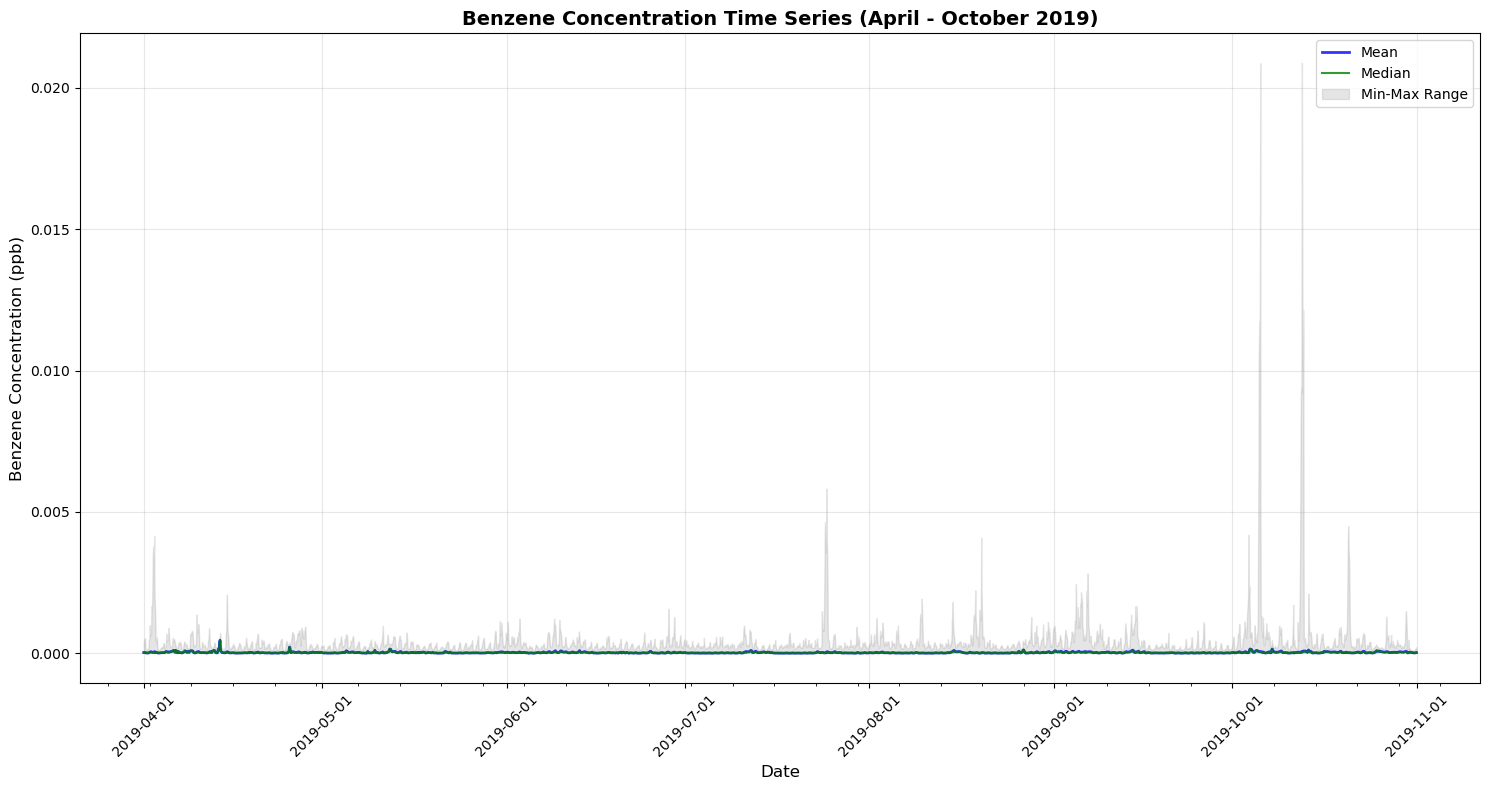

Corrected Statistics (in ppb):
Mean across all time steps: 0.000025 ppb
Max value across all time/space: 0.020884 ppb
Min value across all time/space: 0.000000 ppb


In [46]:
# Conversion factor from integer back to ppb
CONVERSION_FACTOR = 10000000

# Calculate corrected statistics in ppb
mean_values_ppb = mean_values / CONVERSION_FACTOR
median_values_ppb = median_values / CONVERSION_FACTOR
min_values_ppb = min_values / CONVERSION_FACTOR
max_values_ppb = max_values / CONVERSION_FACTOR

# Create corrected time series plot
plt.figure(figsize=(15, 8))

# Plot mean, median, min, max in ppb
plt.plot(time_steps, mean_values_ppb, label='Mean', color='blue', linewidth=2, alpha=0.8)
plt.plot(time_steps, median_values_ppb, label='Median', color='green', linewidth=1.5, alpha=0.8)
plt.fill_between(time_steps, min_values_ppb, max_values_ppb, alpha=0.2, color='gray', label='Min-Max Range')

plt.title('Benzene Concentration Time Series (April - October 2019)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Benzene Concentration (ppb)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"Corrected Statistics (in ppb):")
print(f"Mean across all time steps: {np.mean(mean_values_ppb):.6f} ppb")
print(f"Max value across all time/space: {np.max(max_values_ppb):.6f} ppb")
print(f"Min value across all time/space: {np.min(min_values_ppb):.6f} ppb")

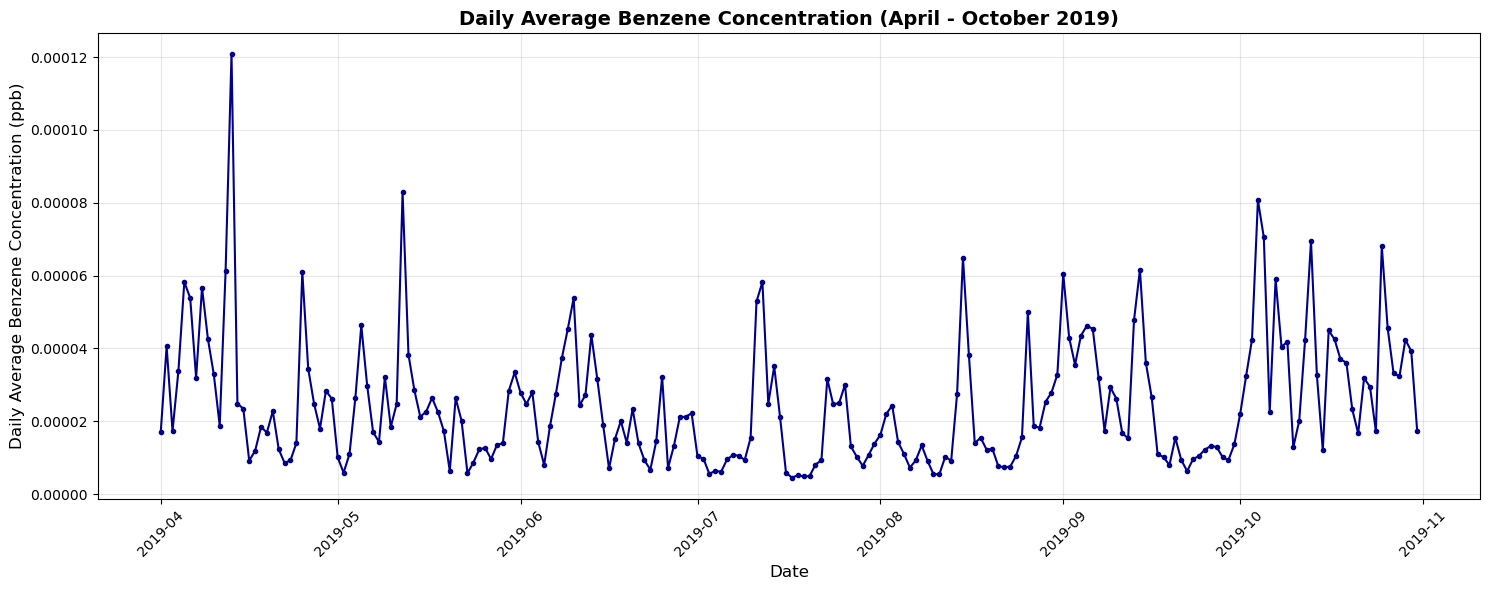

Corrected Daily statistics (in ppb):
Number of complete days: 214
Mean daily concentration: 0.000025 ppb
Max daily average: 0.000121 ppb
Min daily average: 0.000005 ppb


In [47]:
# Create corrected daily aggregated plot
daily_means_ppb = [dm / CONVERSION_FACTOR for dm in daily_means]

plt.figure(figsize=(15, 6))
plt.plot(daily_dates, daily_means_ppb, marker='o', markersize=3, linewidth=1.5, color='darkblue')
plt.title('Daily Average Benzene Concentration (April - October 2019)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Average Benzene Concentration (ppb)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Corrected Daily statistics (in ppb):")
print(f"Number of complete days: {len(daily_means_ppb)}")
print(f"Mean daily concentration: {np.mean(daily_means_ppb):.6f} ppb")
print(f"Max daily average: {np.max(daily_means_ppb):.6f} ppb")
print(f"Min daily average: {np.min(daily_means_ppb):.6f} ppb")

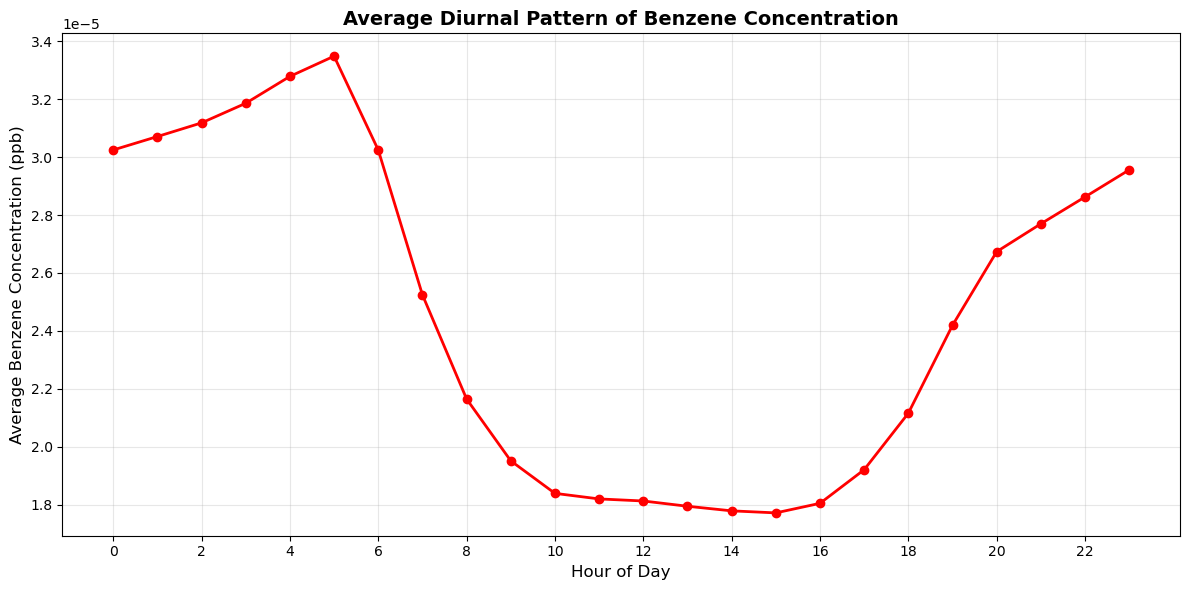

In [49]:
# Create corrected diurnal (hourly) pattern plot
hourly_pattern_ppb = [hp / CONVERSION_FACTOR for hp in hourly_pattern]

plt.figure(figsize=(12, 6))
hours = range(24)
plt.plot(hours, hourly_pattern_ppb, marker='o', linewidth=2, markersize=6, color='red')
plt.title('Average Diurnal Pattern of Benzene Concentration', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Benzene Concentration (ppb)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()

# Step 3: Explore Data

In [8]:
# describe variables in the dataframe
hourly_benz_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TSTEP,26625024.0,2567.500000,1482.635491,0.000000e+00,1283.750000,2567.500000,3851.250000,5135.000000
ROW,26625024.0,35.500000,20.782605,0.000000e+00,17.750000,35.500000,53.250000,71.000000
COL,26625024.0,35.500000,20.782605,0.000000e+00,17.750000,35.500000,53.250000,71.000000
y,26625024.0,-1080.000000,83.130421,-1.222000e+03,-1151.000000,-1080.000000,-1009.000000,-938.000000
x,26625024.0,252.000000,83.130421,1.100000e+02,181.000000,252.000000,323.000000,394.000000
latitude,26625024.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
longitude,26625024.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
BENZ,26625024.0,0.000025,0.000040,9.795119e-09,0.000006,0.000014,0.000031,0.020884


In [19]:
hourly_benz_df_v3.describe().T

,count,mean,std,min,25%,50%,75%,max
TSTEP,26625024.0,2567.500000,1482.635491,0.000000e+00,1283.750000,2567.500000,3851.250000,5135.000000
ROW,26625024.0,35.500000,20.782605,0.000000e+00,17.750000,35.500000,53.250000,71.000000
COL,26625024.0,35.500000,20.782605,0.000000e+00,17.750000,35.500000,53.250000,71.000000
BENZ,26625024.0,0.000025,0.000040,9.795119e-09,0.000006,0.000014,0.000031,0.020884
tstamp_id,26625024.0,2568.500000,1482.635491,1.000000e+00,1284.750000,2568.500000,3852.250000,5136.000000


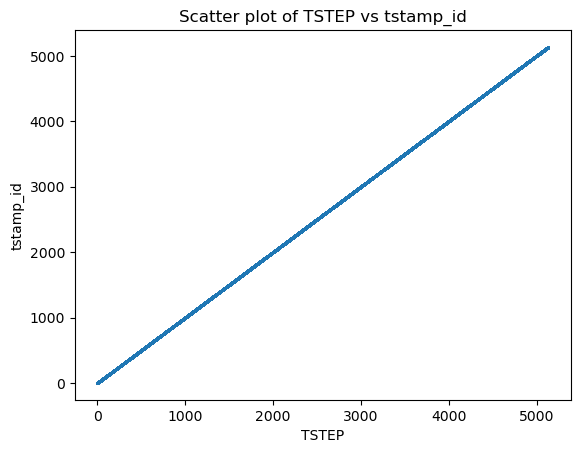

In [25]:
# make a scatter plot of tstep and tstamp_id
import matplotlib.pyplot as plt
plt.scatter(hourly_benz_df_v3['TSTEP'], hourly_benz_df_v3['tstamp_id'], s=1)
plt.xlabel('TSTEP')
plt.ylabel('tstamp_id')
plt.title('Scatter plot of TSTEP vs tstamp_id')
plt.show()

In [ ]:
# plot benzene values for a row and col over time in hourly_benz_df_v6
hourly_benz_df_v6 

# Output files